# Generate Visuals
Creates four publication-ready charts: Portfolio Distribution, Strategic Anchor Map, Hourly DNA, and Top Anchors Leaderboard.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# --- Configuration ---
DATA_DIR = Path("../data/processed")
RESULTS_DIR = Path("../results")
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

sns.set_theme(style="whitegrid")
PALETTE = {
    "Confirmed Behavioral Anchor": "#2ecc71",
    "High-Potential Emerging": "#f1c40f",
    "Inconsistent / Noise": "#95a5a6"
}

Generating Portfolio Distribution...


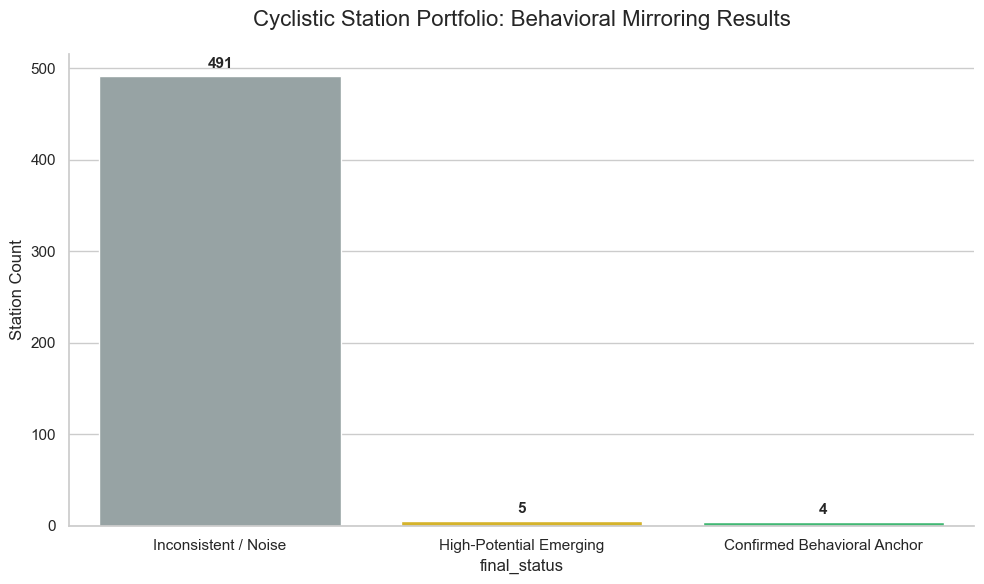

In [7]:
# --- 1. Portfolio Distribution ---
input_path = DATA_DIR / "station_behavior_segments.csv"
if input_path.exists():
    print("Generating Portfolio Distribution...")
    df = pd.read_csv(input_path)
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(
        data=df, x="final_status", hue="final_status",
        order=df["final_status"].value_counts().index,
        palette=PALETTE, legend=False
    )
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 9),
                        textcoords='offset points', fontsize=11, fontweight='bold')
    plt.title("Cyclistic Station Portfolio: Behavioral Mirroring Results", fontsize=16, pad=20)
    plt.ylabel("Station Count")
    sns.despine()
    plt.tight_layout()
    plt.savefig(RESULTS_DIR / "portfolio_distribution.png", dpi=300)
    plt.show()

Generating Strategic Anchor Map...


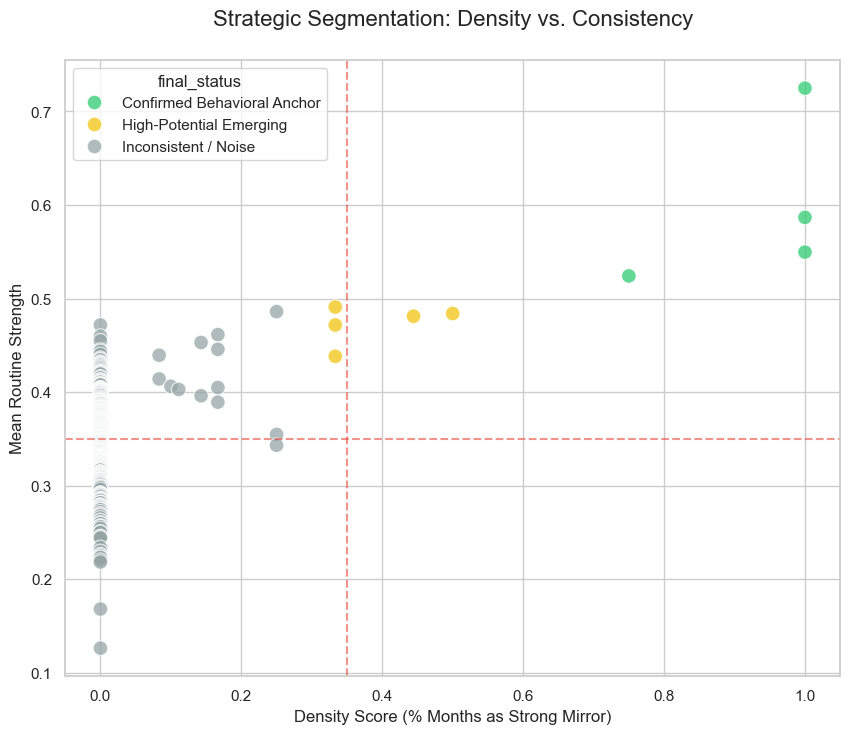

In [8]:
# --- 2. Strategic Anchor Map ---
if input_path.exists():
    print("Generating Strategic Anchor Map...")
    df = pd.read_csv(input_path)
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df, x="density_score", y="consistency_score",
                    hue="final_status", palette=PALETTE, s=110, alpha=0.75)
    plt.axvline(x=0.35, color="#e74c3c", linestyle="--", alpha=0.6)
    plt.axhline(y=0.35, color="#e74c3c", linestyle="--", alpha=0.6)
    plt.title("Strategic Segmentation: Density vs. Consistency", fontsize=16, pad=25)
    plt.xlabel("Density Score (% Months as Strong Mirror)")
    plt.ylabel("Mean Routine Strength")
    plt.savefig(RESULTS_DIR / "behavioral_anchor_map.png", dpi=300, bbox_inches="tight")
    plt.show()

Generating Hourly DNA Chart...


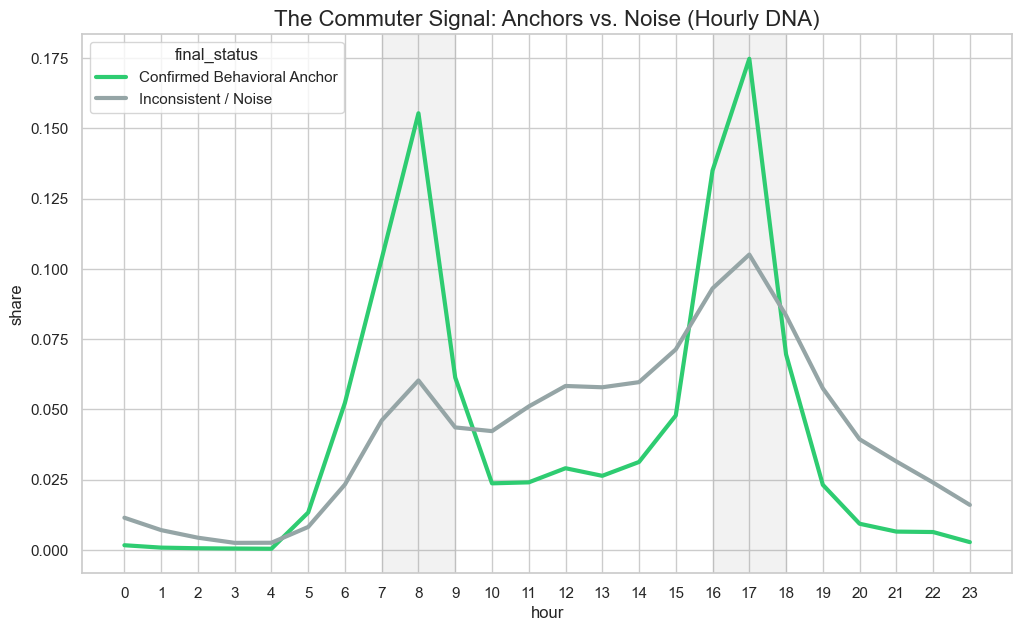

In [9]:
# --- 3. Hourly DNA Chart ---
master_path = DATA_DIR / "fact_trips.csv"
segment_path = DATA_DIR / "station_behavior_segments.csv"

if master_path.exists() and segment_path.exists():
    print("Generating Hourly DNA Chart...")
    df = pd.read_csv(master_path, usecols=["start_station_name", "started_at"])
    df['hour'] = pd.to_datetime(df['started_at']).dt.hour
    segments = pd.read_csv(segment_path, usecols=["start_station_name", "final_status"])
    merged = df.merge(segments, on="start_station_name")
    filtered = merged[merged["final_status"].isin(
        ["Confirmed Behavioral Anchor", "Inconsistent / Noise"])]
    dist = filtered.groupby(["final_status", "hour"]).size().reset_index(name="rides")
    dist["share"] = dist.groupby("final_status")["rides"].transform(lambda x: x / x.sum())
    plt.figure(figsize=(12, 7))
    sns.lineplot(data=dist, x="hour", y="share", hue="final_status",
                 palette=PALETTE, linewidth=3)
    plt.title("The Commuter Signal: Anchors vs. Noise (Hourly DNA)", fontsize=16)
    plt.axvspan(7, 9, color='grey', alpha=0.1, label='Morning Rush')
    plt.axvspan(16, 18, color='grey', alpha=0.1, label='Evening Rush')
    plt.xticks(range(24))
    plt.savefig(RESULTS_DIR / "anchor_vs_noise_dna.png", dpi=300)
    plt.show()

Generating Actionable Insights Leaderboard...


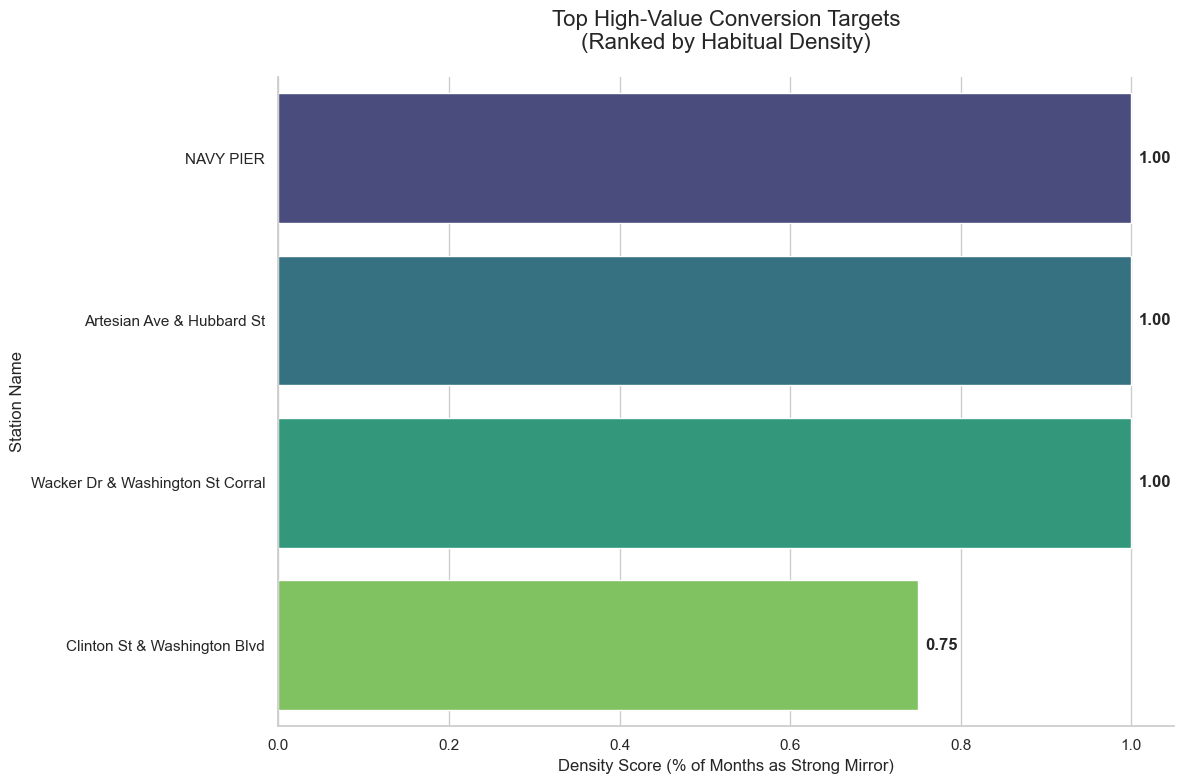


ALL VISUALS GENERATED: Check the '..\results' folder.


In [10]:
# --- 4. Top Anchors Leaderboard ---
if input_path.exists():
    print("Generating Actionable Insights Leaderboard...")
    df = pd.read_csv(input_path)
    top_10 = (df[df['final_status'] == 'Confirmed Behavioral Anchor']
              .sort_values(by='density_score', ascending=False).head(10))
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=top_10, x='density_score', y='start_station_name',
                     palette='viridis', hue='start_station_name', legend=False)
    for i, p in enumerate(ax.patches):
        ax.annotate(f'{p.get_width():.2f}',
                    (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='left', va='center', xytext=(5, 0),
                    textcoords='offset points', fontweight='bold')
    plt.title("Top High-Value Conversion Targets\n(Ranked by Habitual Density)",
              fontsize=16, pad=20)
    plt.xlabel("Density Score (% of Months as Strong Mirror)")
    plt.ylabel("Station Name")
    sns.despine()
    plt.tight_layout()
    plt.savefig(RESULTS_DIR / "top_anchor_leaderboard.png", dpi=300, bbox_inches="tight")
    plt.show()

print(f"\nALL VISUALS GENERATED: Check the '{RESULTS_DIR}' folder.")